# Project Wattpad
## Data Analysis
This jupyter notebook contains the analysis for the Wattpad stories based on the categories, languages and tags. It attempts to answer the following questions from the Project proposal.

### Research Questions to Answer:
* Q1-Mean story popularity by category by read count, vote count, comment count?
* Q5-What are the most popular categories? 
* Q6-What are the most popular languages? 

### Additional Analysis - stories by tags:
After looking at the analysis for categories and languages, we realize that the data is not appropriately categories, and the stories mainly belond to one category called "Random" and are all in English. This means one or more of the following: 
* the data set does not represent an appropriate sample of the entire data 
* the data is not appropriately categorized
* the data we get is mostly in English based on whatever algorithm is used by the api and the sample does not cover all languages
* there is no stories data for other languages

Since the categories does not give us much to group the data, we decided to divide the stories by tags. Each story has multiple tags so we look at story distribution and popularity by tags


In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stories_df = pd.read_csv("Data/stories_for_viz.csv")
stories_df.head()

,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,languageName,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,129173744,Mr Country Club | devan key [ coming soon ],[ coming soon ]\n\nIn which a regular 19 year ...,https://www.wattpad.com/story/129173744-mr-cou...,2017-11-18T19:52:12Z,2018-03-13T23:54:10Z,False,3,False,7590,...,English,False,0,"['collinskey', 'devankey', 'keybros', 'keypers...",12,63,5,https://a.wattpad.com/useravatar/voidtube.128....,chelsea,voidtube
1,141691720,the offing,swallow!,https://www.wattpad.com/story/141691720-the-of...,2018-03-13T00:15:42Z,2018-03-13T23:54:11Z,False,3,False,1676,...,English,False,0,"['aesthetic', 'blood', 'death', 'detective', '...",0,0,0,https://a.wattpad.com/useravatar/sunfully.128....,♡,sunfully
2,141267339,Female Crush X Female Reader,I don't see many of these and I'm not sure if ...,https://www.wattpad.com/story/141267339-female...,2018-03-09T00:26:38Z,2018-03-13T23:54:08Z,False,3,False,24132,...,English,False,1,"['lesbian', 'oneshot', 'readerxcrush']",0,32,4,https://a.wattpad.com/useravatar/Dem0g0rgon.12...,NaN,Dem0g0rgon
3,141129404,F̺͆u̺͆n̺͆n̺͆y̺͆ M̺͆e̺͆m̺͆e̺͆s̺͆,Read some of these funny memes! * I did not ma...,https://www.wattpad.com/story/141129404-f%CD%8...,2018-03-07T13:31:32Z,2018-03-13T23:54:08Z,False,4,False,203,...,English,False,0,"['fun', 'funny', 'humor', 'memes']",0,8,0,https://a.wattpad.com/useravatar/_Daily_News_....,NaN,_Daily_News_
4,136339277,BURN | unpopular opinions,unpopular opinions.\n\n❝ you have married an i...,https://www.wattpad.com/story/136339277-burn-u...,2018-01-24T06:04:34Z,2018-03-13T23:54:07Z,False,15,False,17044,...,English,False,1,"['gender', 'movies', 'opinions', 'pennywise', ...",200,629,95,https://a.wattpad.com/useravatar/dacrethotgome...,benny,dacrethotgomery


In [3]:
stories_df.count()

id              1428
title           1428
description     1428
url             1428
createDate      1428
modifyDate      1428
completed       1428
numParts        1428
deleted         1428
length          1428
categoryId      1428
categoryName    1428
languageId      1428
languageName    1428
mature          1428
rating          1428
tags            1428
commentCount    1428
readCount       1428
voteCount       1428
userAvatar      1428
userFullname    1192
userName        1428
dtype: int64

In [4]:
stories_df["categoryName"].value_counts()

Fanfiction            560
Random                372
Romance               123
Teen Fiction           66
Fantasy                48
Poetry                 38
Humor                  31
Short Story            27
Mystery / Thriller     24
Adventure              21
Action                 20
Non-Fiction            19
General Fiction        19
Horror                 17
Werewolf               10
Vampire                 7
ChickLit                6
Historical Fiction      6
Science Fiction         6
Spiritual               5
Paranormal              3
Name: categoryName, dtype: int64

In [5]:
stories_df["languageName"].value_counts()

English    1425
Español       3
Name: languageName, dtype: int64

## Distribution of stories by category

In [6]:
font={'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

In [7]:
category_grp = stories_df.groupby("categoryName", as_index=False)
stories_by_category = category_grp.count()
stories_by_category

,categoryName,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,...,languageName,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,Action,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,16,20
1,Adventure,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,19,21
2,ChickLit,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,5,6
3,Fanfiction,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,560,560,560,456,560
4,Fantasy,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,35,48
5,General Fiction,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,16,19
6,Historical Fiction,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,5,6
7,Horror,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,15,17
8,Humor,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,29,31
9,Mystery / Thriller,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,18,24


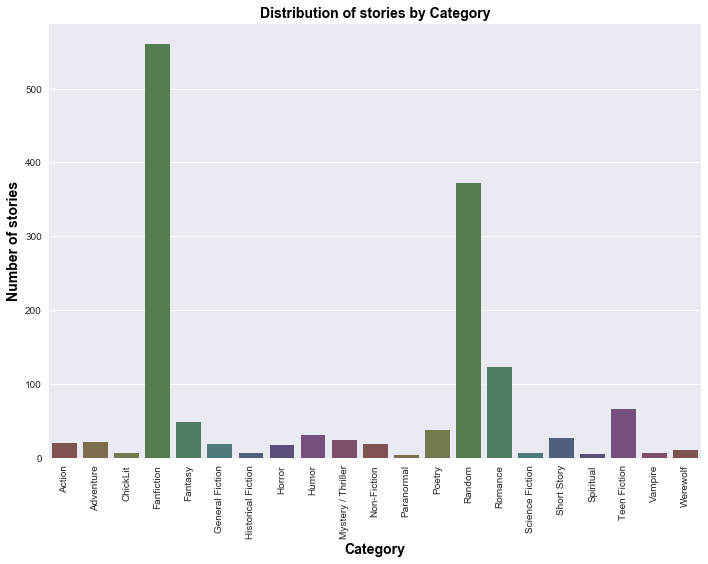

In [8]:
# create a bar plot
plt.figure(figsize=(10,8))

sns.barplot(x=stories_by_category["categoryName"], y=stories_by_category["id"], data=stories_by_category, palette=sns.hls_palette(10, l=.4, s=.3), label="Stories by Category")

# set plot properties
plt.title("Distribution of stories by Category", fontdict=font)
plt.ylabel("Number of stories", fontdict=font)
plt.xlabel("Category", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
# plot and save
plt.savefig("Images/dist_category_bar.png")
plt.show()


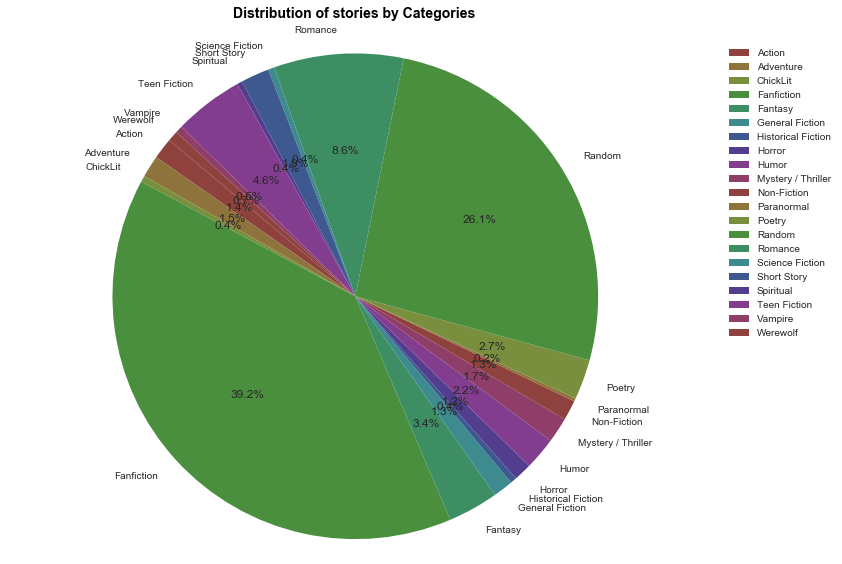

In [9]:
# create pie chart
plt.figure(1, figsize=(10,8 ))

patches, texts, autotexts = plt.pie(stories_by_category["id"], 
                                    labels=stories_by_category["categoryName"], 
                                    colors=sns.hls_palette(10, l=.4, s=.4),
                                    autopct='%1.1f%%', startangle=140)

# set plot properties
plt.legend(patches, stories_by_category["categoryName"], loc="best", bbox_to_anchor=(1.2,1))
plt.axis('equal')
plt.title("Distribution of stories by Categories\n", fontdict=font)
plt.tight_layout()
# plot and save
plt.savefig("Images/dist_category_pie.png")
plt.show()

## Distribution of stories by language

In [10]:
language_grp = stories_df.groupby("languageName", as_index=False)
stories_by_language = language_grp.count()
stories_by_language

,languageName,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,...,languageId,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,English,1425,1425,1425,1425,1425,1425,1425,1425,1425,...,1425,1425,1425,1425,1425,1425,1425,1425,1189,1425
1,Español,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


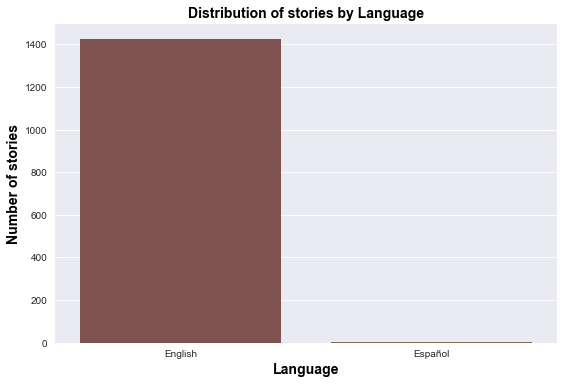

In [11]:
# create bar chart
sns.barplot(x=stories_by_language["languageName"], y=stories_by_language["id"], 
            data=stories_by_language, palette=sns.hls_palette(10, l=.4, s=.3), label="Stories by Language")

# set plot properties
plt.title("Distribution of stories by Language", fontdict=font)
plt.ylabel("Number of stories", fontdict=font)
plt.xlabel("Language", fontdict=font)
plt.tight_layout()

# plot and save image
plt.savefig("Images/dist_language_bar.png")
plt.show()

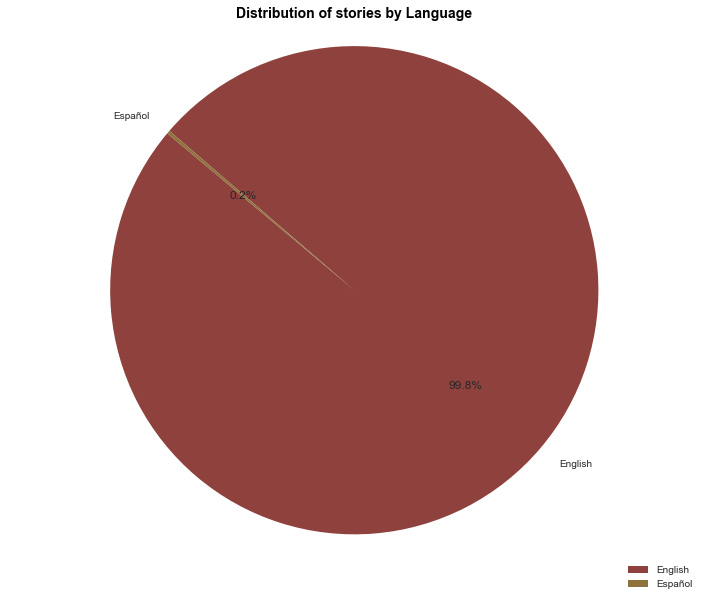

In [12]:
# create a pie chart
plt.figure(1, figsize=(10,8 ))

patches, texts, autotexts = plt.pie(stories_by_language["id"], 
                                    labels=stories_by_language["languageName"],
                                    colors=sns.hls_palette(10, l=.4, s=.4),
                                    autopct='%1.1f%%', startangle=140)

# set pie chart properties
plt.legend(patches, stories_by_language["languageName"], loc="best", bbox_to_anchor=(1,0))
plt.axis('equal')
plt.title("Distribution of stories by Language", fontdict=font)
plt.tight_layout()

# plot and save image
plt.savefig("Images/dist_language_pie.png")
plt.show()



## Popularity of stories by category 

### Popularity of stories based on how many were read

In [13]:
popularity_df = category_grp.mean()
popularity_df

,categoryName,id,completed,numParts,deleted,length,categoryId,languageId,mature,rating,commentCount,readCount,voteCount
0,Action,1.366192e+08,0.000000,7.850000,0.0,39848.800000,14.0,1.000000,0.000000,0.150000,119.150000,375.400000,34.000000
1,Adventure,1.351196e+08,0.095238,9.333333,0.0,45823.380952,11.0,1.000000,0.000000,0.714286,28.571429,428.619048,22.761905
2,ChickLit,1.311197e+08,0.000000,6.833333,0.0,66223.333333,24.0,1.000000,0.000000,0.333333,46.666667,1679.000000,207.666667
3,Fanfiction,1.320029e+08,0.023214,15.314286,0.0,56746.839286,6.0,1.021429,0.007143,0.516071,167.405357,3836.573214,157.469643
4,Fantasy,1.355151e+08,0.020833,8.375000,0.0,37233.270833,3.0,1.000000,0.000000,0.562500,25.604167,147.854167,17.645833
5,General Fiction,1.350149e+08,0.157895,7.105263,0.0,13924.947368,21.0,1.000000,0.000000,0.421053,34.684211,78.947368,7.157895
6,Historical Fiction,1.272985e+08,0.333333,8.333333,0.0,65275.333333,23.0,1.000000,0.000000,0.500000,36.000000,115.833333,24.333333
7,Horror,1.294490e+08,0.000000,6.000000,0.0,10099.529412,9.0,1.000000,0.000000,0.411765,21.705882,74.352941,15.647059
8,Humor,1.378361e+08,0.000000,23.548387,0.0,14348.096774,7.0,1.000000,0.000000,0.419355,141.000000,775.677419,76.225806
9,Mystery / Thriller,1.338682e+08,0.083333,7.958333,0.0,58528.375000,8.0,1.000000,0.000000,0.541667,134.958333,1255.708333,102.708333


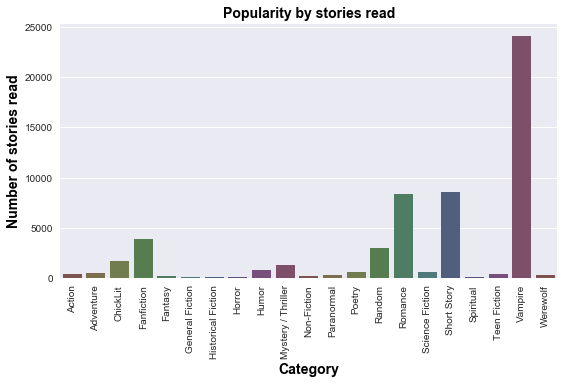

In [14]:
ax = sns.barplot(x=popularity_df["categoryName"], y=popularity_df["readCount"], data=popularity_df, 
                 palette=sns.hls_palette(10, l=.4, s=.3), label="Popularity by Stories read")
plt.title("Popularity by stories read", fontdict=font)
plt.ylabel("Number of stories read", fontdict=font)
plt.xlabel("Category", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("Images/popularity_category_by_readCount.png")
plt.show()

### Popularity of stories based on Comments

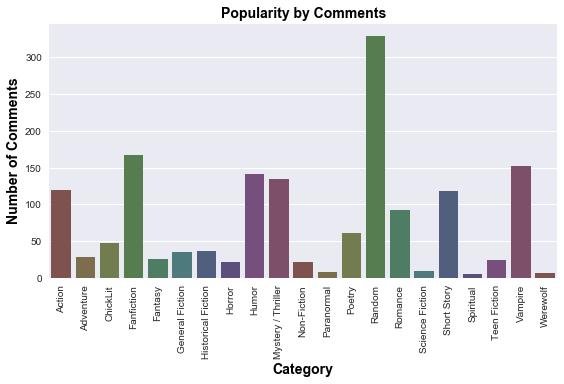

In [15]:
sns.barplot(x=popularity_df["categoryName"], y=popularity_df["commentCount"], data=popularity_df, 
            palette=sns.hls_palette(10, l=.4, s=.3), label="Popularity by Comments")
plt.title("Popularity by Comments", fontdict=font)
plt.ylabel("Number of Comments", fontdict=font)
plt.xlabel("Category", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("Images/popularity__category_by_comments.png")
plt.show()

### Popularity of stories based on Votes

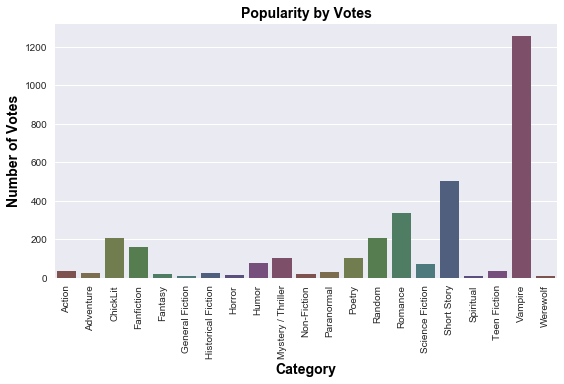

In [16]:
sns.barplot(x=popularity_df["categoryName"], y=popularity_df["voteCount"], data=popularity_df, 
            palette=sns.hls_palette(10, l=.4, s=.3), label="Popularity by Votes")
plt.title("Popularity by Votes", fontdict=font)
plt.ylabel("Number of Votes", fontdict=font)
plt.xlabel("Category", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("Images/popularity_category_by_votes.png")
plt.show()

## Distribution of stories by tags

In [17]:
stories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 23 columns):
id              1428 non-null int64
title           1428 non-null object
description     1428 non-null object
url             1428 non-null object
createDate      1428 non-null object
modifyDate      1428 non-null object
completed       1428 non-null bool
numParts        1428 non-null int64
deleted         1428 non-null bool
length          1428 non-null int64
categoryId      1428 non-null int64
categoryName    1428 non-null object
languageId      1428 non-null int64
languageName    1428 non-null object
mature          1428 non-null bool
rating          1428 non-null int64
tags            1428 non-null object
commentCount    1428 non-null int64
readCount       1428 non-null int64
voteCount       1428 non-null int64
userAvatar      1428 non-null object
userFullname    1192 non-null object
userName        1428 non-null object
dtypes: bool(3), int64(9), object(11)
memory usage: 227.4

In [18]:
# Function to get the tags as a list from the tags columns
def get_tag_list(tag_str):
    tag_str = tag_str.strip("['")
    tag_str = tag_str.strip("']")
    tag_str = tag_str.strip("', '")
    tags = tag_str.split("', '")
    return tags

# get all the tags from the stories and get the top 10 popular tags
all_tags = []
for index,row in stories_df.iterrows():
    tag = row["tags"]
    all_tags += get_tag_list(tag)

tags_df = pd.DataFrame({"tag": all_tags})
tags_counts = pd.DataFrame(tags_df["tag"].value_counts())
popular_tags = tags_counts.iloc[0:10, :]

popular_tags.reset_index(inplace=True)
popular_tags = popular_tags.rename(columns={"tag":"count","index":"tag"})
popular_tags

,tag,count
0,love,207
1,romance,168
2,random,102
3,fanfiction,99
4,bts,87
5,drama,59
6,jimin,45
7,jungkook,44
8,fanfic,43
9,adventure,41


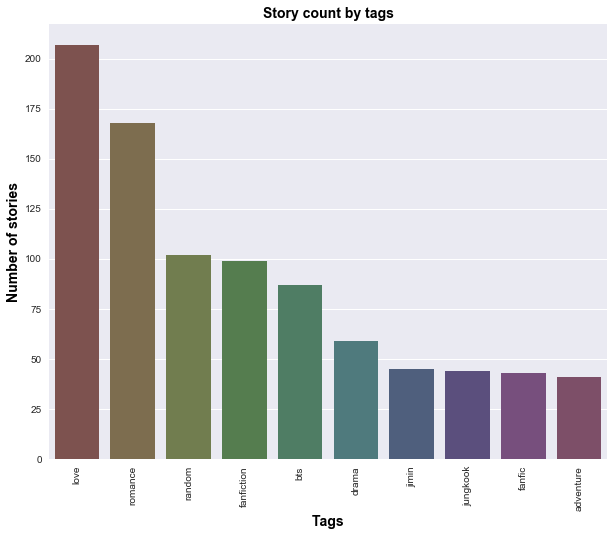

In [19]:
# sns.barplot(x="tag", y="count", data=popular_tags, palette='rainbow')
# plt.title("Story count by tags", size=15)
# plt.ylabel("Number of stories", size=10)
# plt.xlabel("Tags", size=10)
# plt.xticks(rotation="vertical")
# plt.tight_layout()
# plt.savefig("Images/tag_distribution_bar.png")
# plt.show()



plt.figure(figsize=(10,8))
sns.barplot(x="tag", y="count", data=popular_tags, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Story count by tags",fontdict=font)
plt.ylabel("Number of stories",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/tag_distribution_bar.png")
plt.show()

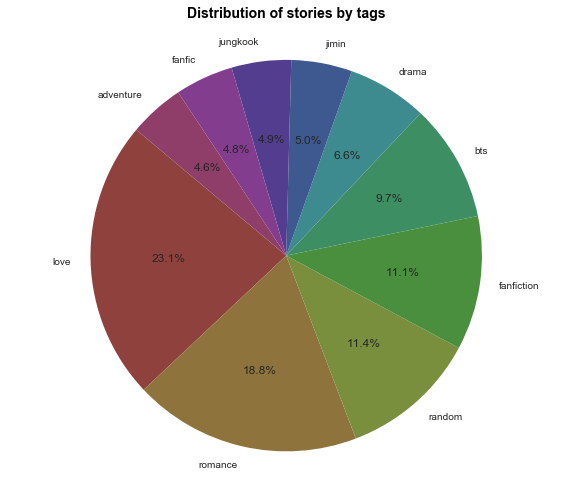

In [20]:
# # create a pie chart
# plt.figure(1, figsize=(6,6))
# patches, texts, autotexts = plt.pie(popular_tags["count"], 
#                                     labels=popular_tags["tag"],
#                                     autopct='%1.1f%%', startangle=140)

# # set pie chart properties
# #plt.legend(patches, popular_tags["tag"], loc="best", bbox_to_anchor=(1.2,1))
# plt.legend(patches, popular_tags["tag"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.axis('equal')
# plt.title("Distribution of stories by tags\n", size=15)
# plt.tight_layout()

# # plot and save image
# plt.savefig("Images/tag_distribution_pie.png")
# plt.show()


# create a pie chart
plt.figure(1, figsize=(10,8 ))
patches, texts, autotexts = plt.pie(popular_tags["count"], 
                                    labels=popular_tags["tag"],colors=sns.hls_palette(10, l=.4, s=.4),
                                    autopct='%1.1f%%', shadow=False, startangle=140)

# set pie chart properties
#plt.legend(patches, popular_tags["tag"], loc="best", bbox_to_anchor=(1.2,1))
plt.axis('equal')
plt.title("Distribution of stories by tags\n",fontdict=font)

# plot and save image
plt.savefig("Images/tag_distribution_pie.png")
plt.show()


## Popularity of stories by tags

In [21]:
# Getting the vote count, comment count and read count by tags
tags_dict = {}
read_dict = {}
comment_dict = {}
vote_dict = {}

# Loop through the stories and add the counts for each tag of the story
for index,row in stories_df.iterrows():
    story_tags = row["tags"]
    read_count = row["readCount"]
    comment_count = row["commentCount"]
    vote_count = row["voteCount"]
    
    # For each story, loop through the tags and see which one matches the tags list.
    for tag_index, tag_row in popular_tags.iterrows():
        tag_name = tag_row["tag"]
        if tag_name in get_tag_list(story_tags):
            if tag_name in tags_dict.keys():
                tags_dict[tag_name] += 1
                read_dict[tag_name] += read_count
                comment_dict[tag_name] += comment_count
                vote_dict[tag_name] += vote_count
            else:
                tags_dict[tag_name] = 1
                read_dict[tag_name] = read_count
                comment_dict[tag_name] = comment_count
                vote_dict[tag_name] = vote_count
    
# create data frame for all types of counts
# vote counts
vote_df = pd.DataFrame({"tag": list(vote_dict.keys()),
                       "votes": list(vote_dict.values()) })

# comment counts
comment_df = pd.DataFrame({"tag": list(comment_dict.keys()),
                       "comments": list(comment_dict.values())})

# comment counts
reads_df = pd.DataFrame({"tag": list(read_dict.keys()),
                       "reads": list(read_dict.values())})



### Popularity of stories by tags, using the vote count

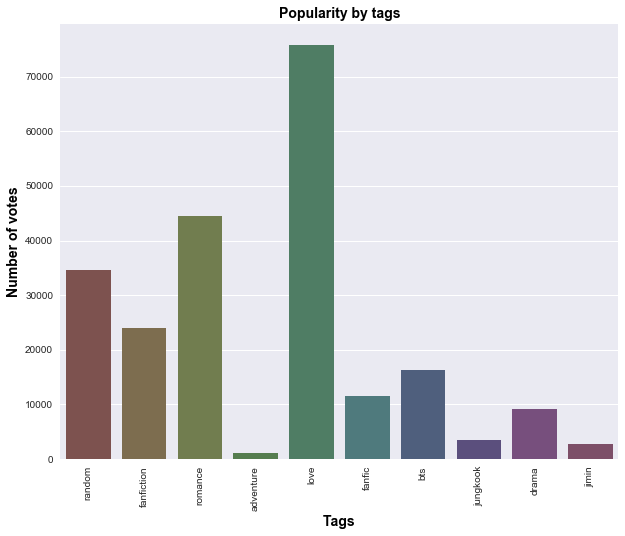

In [22]:
# sns.barplot(x="tag", y="votes", data=vote_df, palette='rainbow')
# plt.title("Popularity by tags", size=15)
# plt.ylabel("Number of votes", size=10)
# plt.xlabel("Tags", size=10)
# plt.xticks(rotation="vertical")
# plt.tight_layout()
# plt.savefig("Images/popularity_tags_by_votes.png")
# plt.show()


plt.figure(figsize=(10,8))

sns.barplot(x="tag", y="votes", data=vote_df, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Popularity by tags",fontdict=font)
plt.ylabel("Number of votes",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_votes.png")
plt.show()

### Popularity of stories by tags, using the comment count

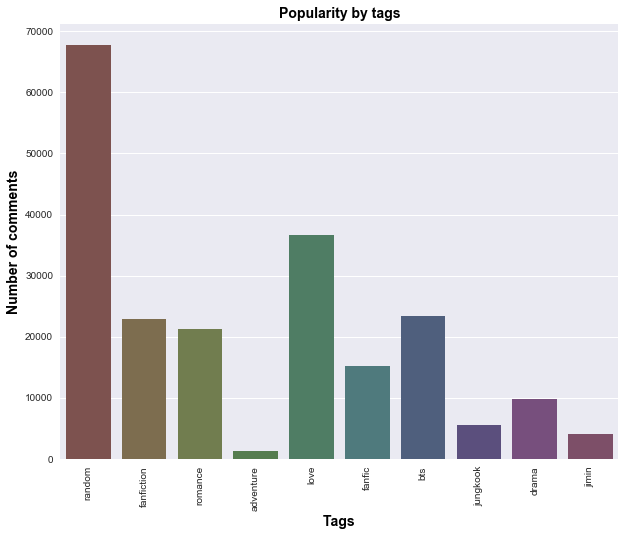

In [23]:
# sns.barplot(x="tag", y="comments", data=comment_df, palette='rainbow')
# plt.title("Popularity by tags", size=15)
# plt.ylabel("Number of comments", size=10)
# plt.xlabel("Tags", size=10)
# plt.xticks(rotation="vertical")
# plt.tight_layout()
# plt.savefig("Images/popularity_tags_by_comments.png")
# plt.show()

plt.figure(figsize=(10,8))

sns.barplot(x="tag", y="comments", data=comment_df, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Popularity by tags",fontdict=font)
plt.ylabel("Number of comments",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_comments.png")
plt.show()


### Popularity of stories by tags, using the read count

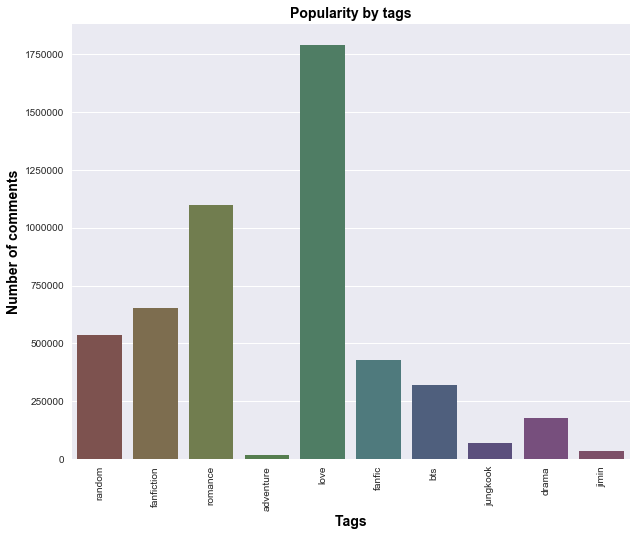

In [24]:
# sns.barplot(x="tag", y="reads", data=reads_df, palette='rainbow')
# plt.title("Popularity by tags", size=15)
# plt.ylabel("Number of comments", size=10)
# plt.xlabel("Tags", size=10)
# plt.xticks(rotation="vertical")
# plt.tight_layout()
# plt.savefig("Images/popularity_tags_by_reads.png")
# plt.show()


plt.figure(figsize=(10,8))

sns.barplot(x="tag", y="reads", data=reads_df, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Popularity by tags",fontdict=font)
plt.ylabel("Number of comments",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_reads.png")
plt.show()

# Plots for the following research questions:
* Number of stories created each year based on creation date?
* Average time to finish a story? Search for completed stories, take difference between modify and create date.
* Average number of parts per story (for completed stories)?
* Does length of read count correlate to a certain story length? Does read count correlate to number of parts per story?

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [26]:
font={'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

In [27]:
plotdf=pd.read_csv('Data/stories_for_viz.csv')

In [28]:
#Pull Year from createDate and add as Year column
plotdf["year"]=""
plotdf["timediff"]=""
date=plotdf.at[0,"createDate"]
year=datetime.strptime(date,"%Y-%m-%dT%H:%M:%SZ").strftime("%Y")
for r in range(len(plotdf.index)):
    cdate=datetime.strptime(plotdf.at[r,"createDate"],"%Y-%m-%dT%H:%M:%SZ")
    mdate=datetime.strptime(plotdf.at[r,"modifyDate"],"%Y-%m-%dT%H:%M:%SZ")
    plotdf.at[r,"year"]=datetime.strftime(cdate,"%Y")
    plotdf.at[r,"timediff"]=(mdate-cdate).days
plotdf.head(2)


,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName,year,timediff
0,129173744,Mr Country Club | devan key [ coming soon ],[ coming soon ]\n\nIn which a regular 19 year ...,https://www.wattpad.com/story/129173744-mr-cou...,2017-11-18T19:52:12Z,2018-03-13T23:54:10Z,False,3,False,7590,...,0,"['collinskey', 'devankey', 'keybros', 'keypers...",12,63,5,https://a.wattpad.com/useravatar/voidtube.128....,chelsea,voidtube,2017,115
1,141691720,the offing,swallow!,https://www.wattpad.com/story/141691720-the-of...,2018-03-13T00:15:42Z,2018-03-13T23:54:11Z,False,3,False,1676,...,0,"['aesthetic', 'blood', 'death', 'detective', '...",0,0,0,https://a.wattpad.com/useravatar/sunfully.128....,♡,sunfully,2018,0


## Number of Stories Created by Year

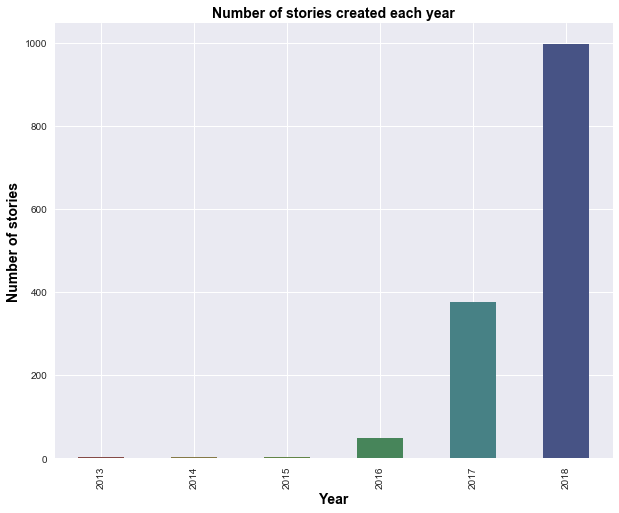

In [29]:
yeargroup=plotdf["id"].groupby(plotdf["year"]).count()
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
yeargroup.plot.bar(color=sns.hls_palette(8, l=.4, s=.3))
plt.title("Number of stories created each year",fontdict=font)
plt.xlabel("Year",fontdict=font)
plt.ylabel("Number of stories",fontdict=font)
plt.savefig('Images/Stories_Created_by_Year.png')
plt.show()

## Average Overall Time to Complete and Number of Chapters

In [30]:
completestories_df=plotdf.loc[(plotdf["completed"] ==True)]
avgtimetocomplete=round(completestories_df["timediff"].mean())
avgnumparts=round(completestories_df["numParts"].mean())
output=pd.DataFrame({"Average Time to Complete (days)":avgtimetocomplete,"Average Number of Chapters":avgnumparts},index=[0])
output

,Average Number of Chapters,Average Time to Complete (days)
0,19,167.0


## Time to Complete vs Popularity (Vote Count)


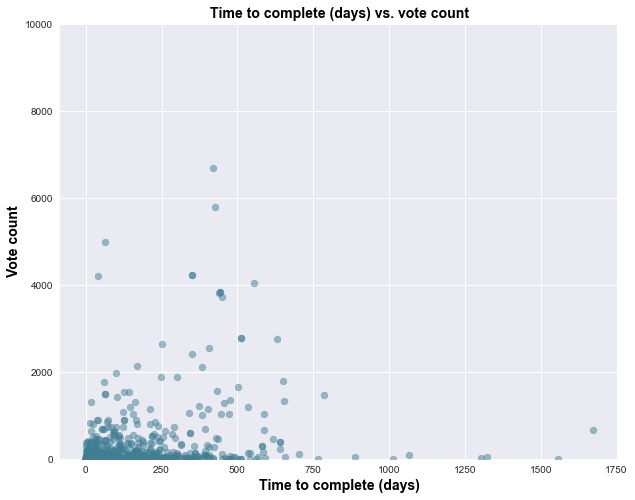

In [31]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(plotdf["timediff"],plotdf["voteCount"],alpha=.5,color=sns.diverging_palette(220, 20, n=1))
plt.title("Time to complete (days) vs. vote count",fontdict=font)
plt.xlabel("Time to complete (days)",fontdict=font)
plt.ylabel("Vote count",fontdict=font)
plt.ylim(0,10000)
plt.show()

## Story Length vs. Popularity

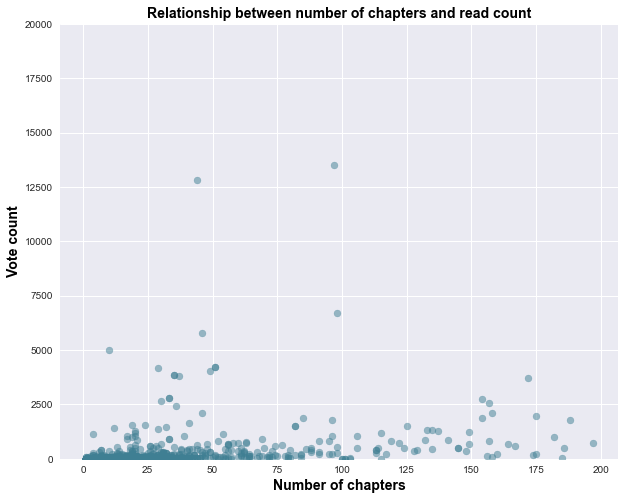

In [32]:
#readcount vs numparts
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(plotdf["numParts"],plotdf["voteCount"],alpha=.5,color=sns.diverging_palette(220, 20, n=1))
plt.title("Relationship between number of chapters and read count",fontdict=font)
plt.xlabel("Number of chapters",fontdict=font)
plt.ylabel("Vote count",fontdict=font)
plt.ylim(0,20000)

plt.savefig('Images/StoryLength_VoteCount_chapters.png')
plt.show()

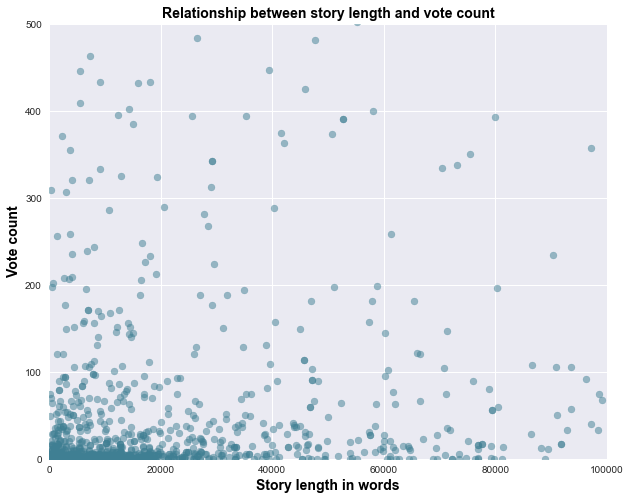

In [33]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(plotdf["length"],plotdf["voteCount"], alpha=.5,color=sns.diverging_palette(220, 20, n=1))
plt.title("Relationship between story length and vote count",fontdict=font)
plt.xlabel("Story length in words",fontdict=font)
plt.ylabel("Vote count",fontdict=font)
plt.xlim(0,100000)
plt.ylim(0,500)
plt.savefig('Images/StoryLength_VoteCount_words')

plt.show()

## Number of Stories Published by User

In [34]:
storybyauthor=plotdf["id"].groupby(plotdf["userName"]).count()
plotdf.head(2)

,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName,year,timediff
0,129173744,Mr Country Club | devan key [ coming soon ],[ coming soon ]\n\nIn which a regular 19 year ...,https://www.wattpad.com/story/129173744-mr-cou...,2017-11-18T19:52:12Z,2018-03-13T23:54:10Z,False,3,False,7590,...,0,"['collinskey', 'devankey', 'keybros', 'keypers...",12,63,5,https://a.wattpad.com/useravatar/voidtube.128....,chelsea,voidtube,2017,115
1,141691720,the offing,swallow!,https://www.wattpad.com/story/141691720-the-of...,2018-03-13T00:15:42Z,2018-03-13T23:54:11Z,False,3,False,1676,...,0,"['aesthetic', 'blood', 'death', 'detective', '...",0,0,0,https://a.wattpad.com/useravatar/sunfully.128....,♡,sunfully,2018,0


## Ratings

In [35]:
# mature=plotdf.loc[(plotdf["mature"]==True)]
maturecount=plotdf["id"].groupby(plotdf["mature"]==True).count()
maturecount

# nmature=plotdf.loc[(plotdf["mature"]==False)]

mature
False    1422
True        6
Name: id, dtype: int64

In [36]:
ratings_group=plotdf["id"].groupby(plotdf["rating"]).count()
ratings_group

rating
0    808
1    601
3     13
4      6
Name: id, dtype: int64

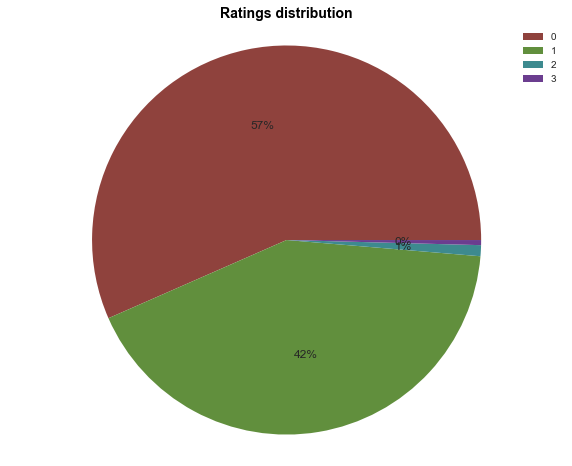

In [37]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.pie(ratings_group,colors=sns.hls_palette(4, l=.4, s=.4),autopct='%1.0f%%')
plt.legend(labels=[0,1,2,3])
plt.title("Ratings distribution",fontdict=font)
plt.axis('equal')
plt.savefig('Images/Ratings Distribution')

plt.show()

## Sentiment Analysis

In [38]:
#dependencies
import json
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [39]:
#read in data
df=pd.read_csv('data/stories_for_viz.csv')

In [40]:
font={'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

In [41]:
desc_sent_arr=[]
tags_sent_arr=[]
for desc in df['description']:
    desc_sent_arr.append(analyzer.polarity_scores(desc)['compound'])
for tag in df['tags']:
    
    list=tag.split("', '")
    list=list[1:len(list)-1]
    tags_sent_arr.append(analyzer.polarity_scores(' '.join(list))['compound'])
    


In [42]:
df['description sentiment (compound)']=desc_sent_arr
df['tag sentiment (compound)']=tags_sent_arr
df.columns

Index(['id', 'title', 'description', 'url', 'createDate', 'modifyDate',
       'completed', 'numParts', 'deleted', 'length', 'categoryId',
       'categoryName', 'languageId', 'languageName', 'mature', 'rating',
       'tags', 'commentCount', 'readCount', 'voteCount', 'userAvatar',
       'userFullname', 'userName', 'description sentiment (compound)',
       'tag sentiment (compound)'],
      dtype='object')

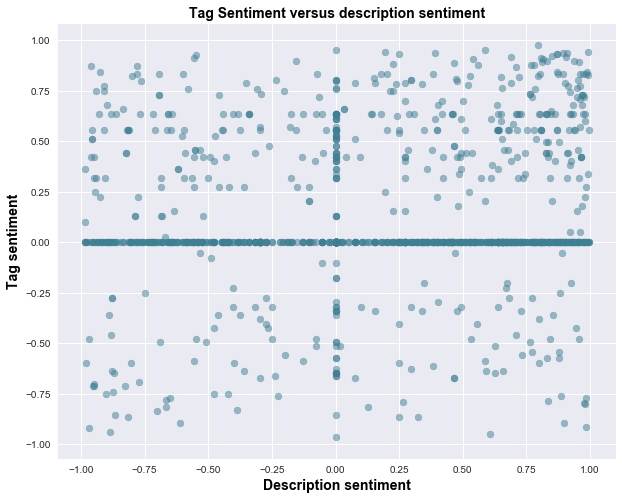

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['description sentiment (compound)'], y=df['tag sentiment (compound)'],alpha=.5,\
            color=seaborn.diverging_palette(220, 20, n=1), )
plt.xlabel('Description sentiment',fontdict=font)
plt.ylabel('Tag sentiment',fontdict=font)
plt.title('Tag Sentiment versus description sentiment',fontdict=font)
plt.savefig('images/tag_sent_v_desc_sent.png')
plt.show()

In [44]:
bins=[-1,-.5,-.01,0.1,.5,1]
group_names = ['Very Negative', 'Negative','Neutral', 'Positive', 'Very Positive']
df_tags_bins=pd.cut(df['tag sentiment (compound)'], bins, labels=group_names)
df_tags_bins_counts=df_tags_bins.value_counts()
df_tags_bins_counts=df_tags_bins_counts[group_names]

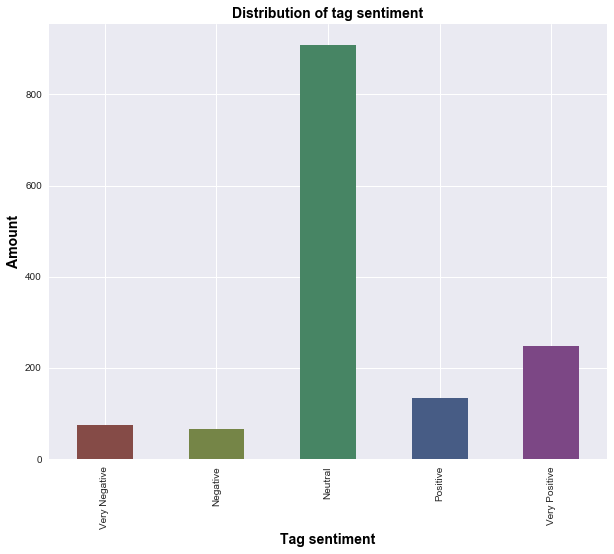

In [45]:
plt.figure(figsize=(10,8))
df_tags_bins_counts.plot(kind='bar',color=seaborn.hls_palette(5, l=.4, s=.3))
plt.xlabel('Tag sentiment',fontdict=font)
plt.ylabel('Amount',fontdict=font)
plt.title('Distribution of tag sentiment',fontdict=font)
plt.savefig('images/TagSentimentBar.png')
plt.show()

In [46]:
bins=[-1,-.5,-.01,0.1,.5,1]
group_names = ['Very Negative', 'Negative','Neutral', 'Positive', 'Very Positive']
df_description_bins=pd.cut(df['description sentiment (compound)'], bins, labels=group_names)
df_description_bins_counts=df_description_bins.value_counts()
df_description_bins_counts=df_description_bins_counts[group_names]

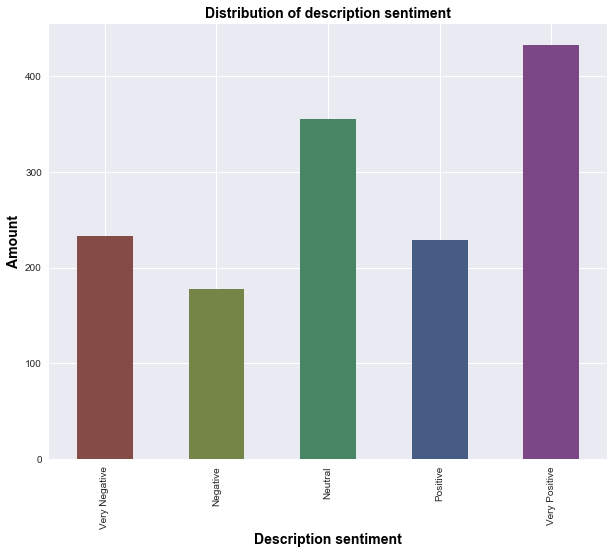

In [47]:
plt.figure(figsize=(10,8))
df_description_bins_counts.plot(kind='bar',color=seaborn.hls_palette(5, l=.4, s=.3))
plt.xlabel('Description sentiment',fontdict=font)
plt.ylabel('Amount',fontdict=font)
plt.title('Distribution of description sentiment',fontdict=font)
plt.savefig('images/DescriptionSentimentBar.png')
plt.show()